In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [6]:
new_df = df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
new_df['RainToday'] = df['RainToday'].replace(to_replace=['No', 'Yes'], value=[0, 1])
new_df['RainTomorrow'] = df['RainTomorrow'].replace(to_replace=['No', 'Yes'], value=[0, 1])
new_df = new_df.fillna(0)
new_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [16]:
def z_score_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return(X_norm)

normalized_df = z_score_normalization(np.array(new_df))

In [6]:
null_sun = df['Sunshine'].isna().sum()
null_sun_percent = null_sun*100/df.shape[0]
print(null_sun_percent)

48.00976213391998


In [7]:
null_var = df['Cloud9am'].isna().sum()
null_var_percent = null_var*100/df.shape[0]
print(null_var_percent)

38.42155919153032


In [8]:
null_var = df['Cloud3pm'].isna().sum()
null_var_percent = null_var*100/df.shape[0]
print(null_var_percent)

40.80709473394748


[array([72.57142857, 25.05714286]), array([23.58823529, 32.20588235]), array([59.61290323, 78.83870968])]
[72.57142857 23.58823529 59.61290323]
[72.57142857 23.58823529 59.61290323]


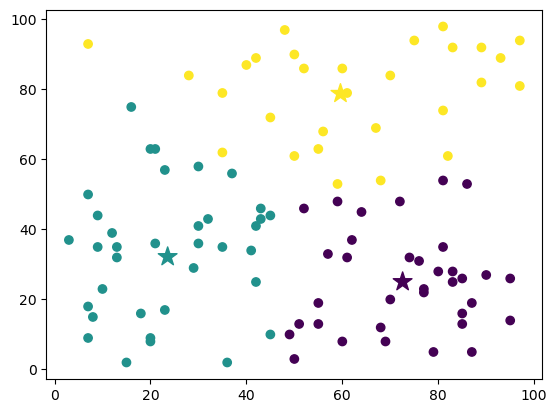

In [21]:
class KMeans:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None
        self.sse_history = None
        
    @staticmethod
    
    
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
        
    def fit(self, X, max_iterations=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        self.sse_history = []
        for _ in range(max_iterations):
            
            #y is list of assigned clusters for each record/data point
            y = []
            iteration_sse = 0
            
            for record in X:
                distance = KMeans.euclidean_distance(record, self.centroids)
                min_distance = np.min(distance)
                iteration_sse += min_distance
                assigned_cluster = np.argmin(distance)
                y.append(assigned_cluster)
            
            self.sse_history.append(iteration_sse)
            y = np.array(y)
            
            #list to store indices of points in that cluster
            cluster_indices = []
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))
            
            #re-assignment of cluster centroids
            cluster_centres = []
            
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centres.append(self.centroids[i])
                else:
                    cluster_centres.append(np.mean(X[indices], axis=0)[0])
             
            if np.max(self.centroids - np.array(cluster_centres)) < 0.0001:
                break
            else:
                self.centroids = cluster_centres
        
        return y

random_points = np.random.randint(0, 100, (100, 2))

kmeans = KMeans(k=3)
cluster_labels = kmeans.fit(random_points)


# for i in range(len(kmeans.centroids)):
#     kmeans.centroids[i] = list(kmeans.centroids[i])

print(kmeans.centroids)
# print(random_points)
# print(random_points[:, 0])
print(np.array(kmeans.centroids)[:, 0])
print(np.array(kmeans.centroids)[:, 0])

plt.scatter(random_points[:, 0], random_points[:, 1], c=cluster_labels)
plt.scatter(np.array(kmeans.centroids)[:, 0], np.array(kmeans.centroids)[:, 1], c=range(len(kmeans.centroids)), marker='*', s=200)
plt.show()        

In [58]:
data = z_score_normalization(np.array(new_df))
kmeans = KMeans(k=4)
cluster_labels = kmeans.fit(data)
print(kmeans.centroids)
print(kmeans.sse_history)

[array([ 0.1186655 , -0.46982969,  0.71340727, -0.14666845, -0.29564857,
        0.4556493 ,  0.45354002,  0.41559251,  0.61250476,  0.88940864,
        0.32006898,  0.32595654,  0.84574192,  0.86179793, -0.17655855,
       -0.45020036,  1.11269817,  1.00095983]), array([-0.48736944, -0.45514195, -0.02507573, -0.66825464, -0.78165735,
       -0.57648665, -0.41838602, -0.63136709, -0.12317425, -0.17139079,
       -2.91067195, -2.91840023, -0.52125241, -0.57868285, -0.51459426,
       -0.56016624, -0.03745981, -0.03660461]), array([-0.59921339, -0.43063571, -0.21233998, -0.3791763 , -0.15247546,
       -0.3244556 , -0.35518759, -0.29887288,  0.22365657, -0.00618186,
        0.34893214,  0.34938517, -0.28423933, -0.29383804, -0.5456408 ,
       -0.36477191, -0.30294603, -0.31027367]), array([ 0.78681467,  0.97856827, -0.22763225,  0.76745974,  0.63868766,
        0.26185421,  0.24759696,  0.27701363, -0.64135044, -0.54298756,
        0.32669979,  0.32469015, -0.06986123, -0.05059639,  0.9

<function matplotlib.pyplot.show(close=None, block=None)>

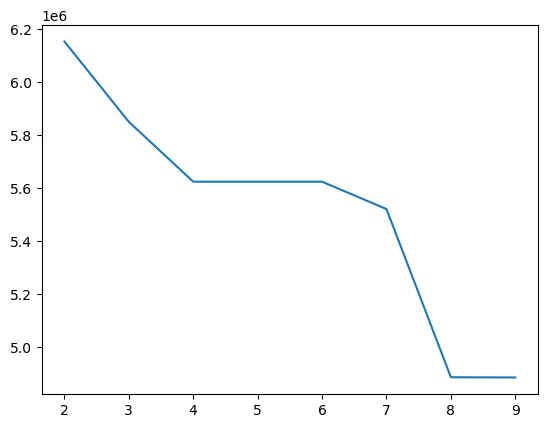

In [60]:
data = np.array(new_df)
elbow_y = []
elbow_x = []
# kmeans = KMeans(k=1)
# cluster_labels = kmeans.fit(data)
# elbow_y.append(kmeans.sse_history[-1])
# elbow_x.append(1)

for i in range(2, 10): 
    kmeans = KMeans(k=i)
    cluster_labels = kmeans.fit(data)
    elbow_y.append(min(kmeans.sse_history))
    elbow_x.append(i)

plt.plot(elbow_x, elbow_y)
plt.show

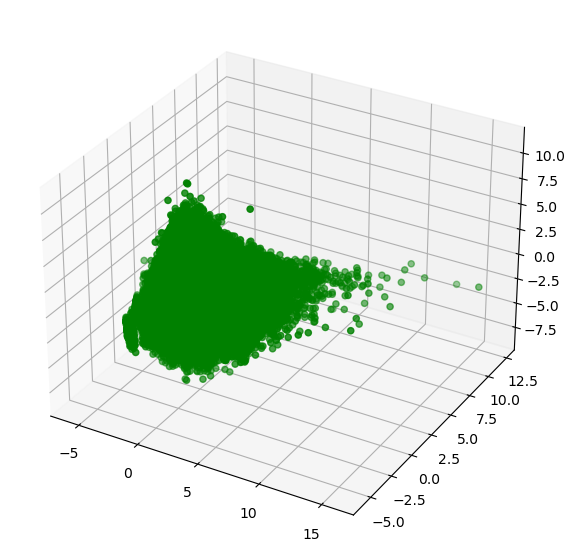

In [18]:
pca = PCA(n_components = 3)
X2D = pca.fit_transform(np.array(normalized_df))
X2D
z = X2D[:, 0]
x = X2D[:, 1]
y = X2D[:, 2]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.show()

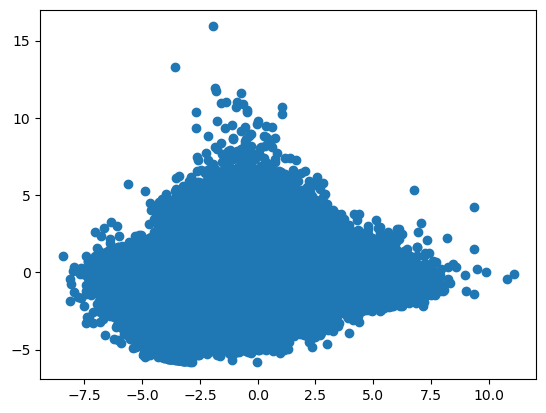

In [19]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(np.array(normalized_df))
x = X2D[:, 0]
y = X2D[:, 1]
plt.scatter(x, y)
plt.show()

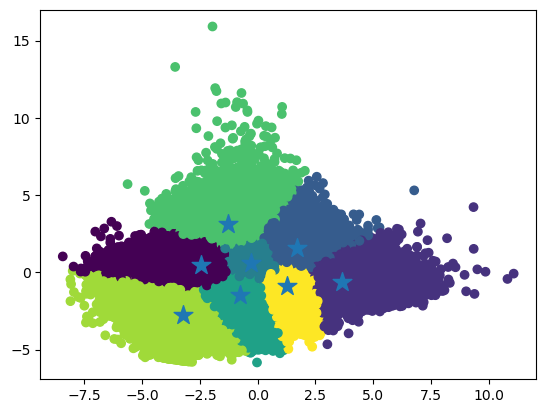

In [25]:
kmeans = KMeans(k=8)
cluster_labels = kmeans.fit(X2D)

plt.scatter(X2D[:, 0], X2D[:, 1], c=cluster_labels)
plt.scatter(np.array(kmeans.centroids)[:, 0], np.array(kmeans.centroids)[:, 1], marker='*', s=200)
plt.show() 